In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [31]:
df = pd.read_csv("HR_Analytics.csv")
df.head(10)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0.0


In [32]:
df.tail(10)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1470,RM233,59,55+,No,Travel_Rarely,818,Human Resources,6,2,Medical,...,4,80,0,7,2,2,2,2,2,2.0
1471,RM744,59,55+,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,...,1,80,0,30,4,3,5,3,4,3.0
1472,RM759,59,55+,No,Travel_Rarely,1089,Sales,1,2,Technical Degree,...,3,80,1,14,1,1,6,4,0,4.0
1473,RM898,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,...,4,80,0,13,2,3,6,1,0,5.0
1474,RM920,59,55+,No,Travel_Rarely,1429,Research & Development,18,4,Medical,...,4,80,0,25,6,2,9,7,5,4.0
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [34]:
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

<Axes: >

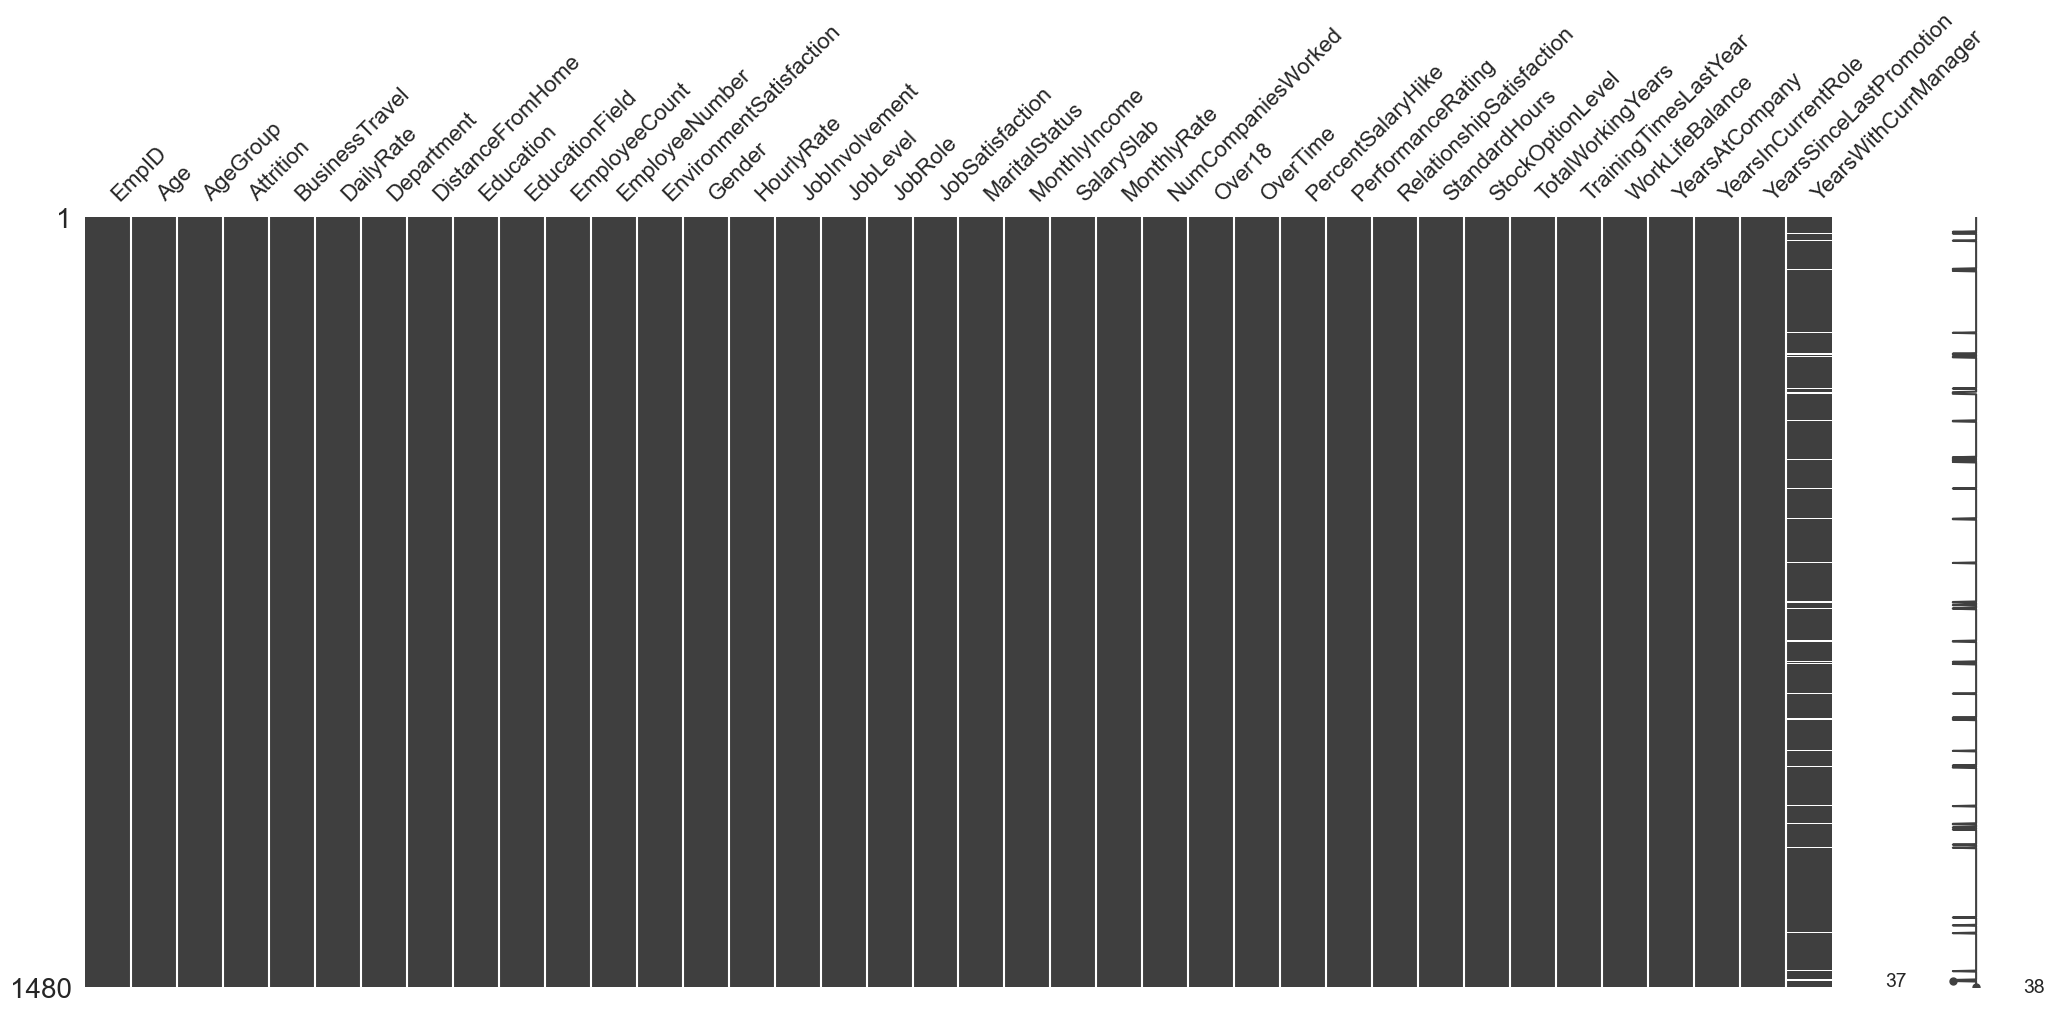

In [35]:
msno.matrix(df)

In [36]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(0, inplace = True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_4264\3386135752.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(0, inplace = True)


In [37]:
print("\nDescriptive Statistics:")
df.describe().round(2)


Descriptive Statistics:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1480.00,1480.00,1480.00,1480.00,1480.0,1480.00,1480.00,1480.00,1480.00,1480.00,...,1480.00,1480.00,1480.0,1480.00,1480.00,1480.00,1480.00,1480.00,1480.00,1480.00
mean,36.92,801.38,9.22,2.91,1.0,1031.86,2.72,65.85,2.73,2.06,...,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.18
std,9.13,403.13,8.13,1.02,0.0,605.96,1.09,20.33,0.71,1.11,...,0.36,1.08,0.0,0.85,7.77,1.29,0.71,6.12,3.62,3.22
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,493.75,2.00,48.00,2.00,1.00,...,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00
50%,36.00,800.00,7.00,3.00,1.0,1027.50,3.00,66.00,3.00,2.00,...,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00
75%,43.00,1157.00,14.00,4.00,1.0,1568.25,4.00,83.00,3.00,3.00,...,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00


### DATA ANALYSIS

In [38]:
TotalEmployee = df['EmployeeCount'].sum()

In [39]:
print('Total Employee :',TotalEmployee)

Total Employee : 1480


In [40]:
AttritionCount = df['Attrition'].value_counts()['Yes']
print('Attrition Count:',AttritionCount)

Attrition Count: 238


In [41]:
AttritionRate = int(AttritionCount/TotalEmployee * 100)
print("Attrition Rate :",AttritionRate,'%')

Attrition Rate : 16 %


In [42]:
Age = df['Age'].sum()
AvgAge = int(Age/TotalEmployee)
print('Average age :',AvgAge)

Average age : 36


In [43]:
Salary = df['MonthlyIncome'].sum()
AvgSalary = int(Salary/TotalEmployee)
print('Average Salary :',AvgSalary)

Average Salary : 6504


In [44]:
Years = df['YearsAtCompany'].sum()
AvgYears = int(Years/TotalEmployee)
print('Average years at company :',AvgYears)

Average years at company : 7


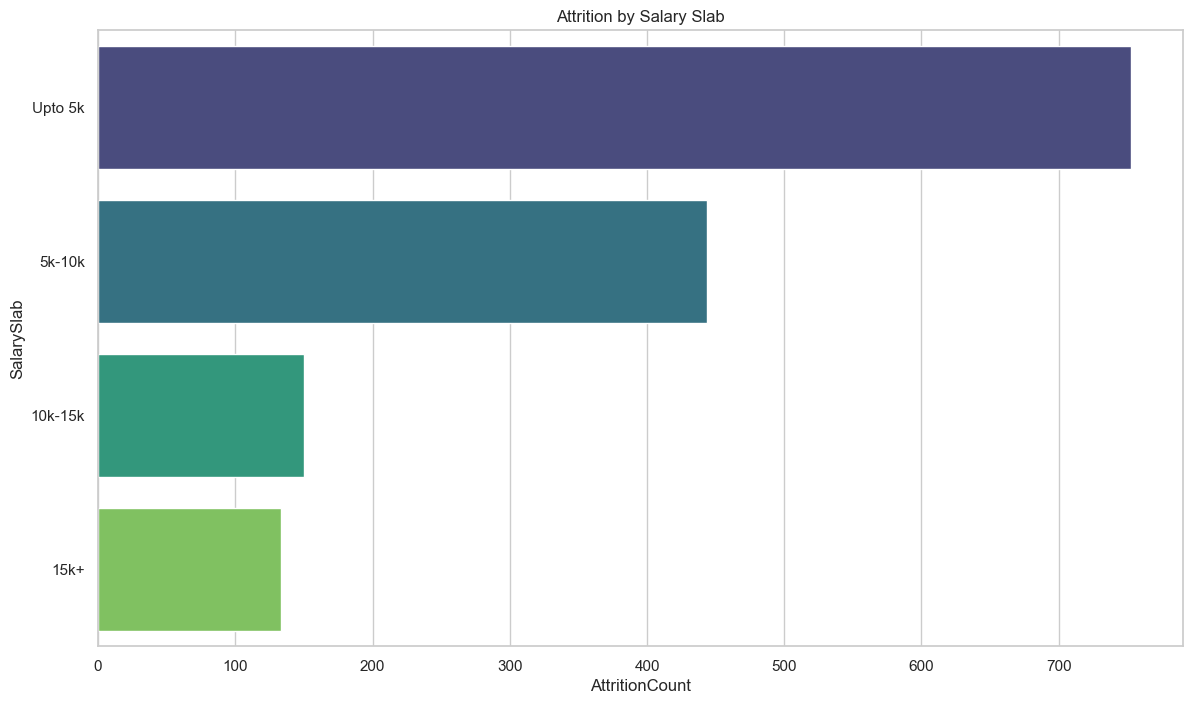

In [45]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='SalarySlab', hue='SalarySlab',palette='viridis',legend = False, order=df['SalarySlab'].value_counts().index)
plt.title('Attrition by Salary Slab')
plt.xlabel('AttritionCount')
plt.ylabel('SalarySlab')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_4264\2633285207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=attrition_data, palette='viridis', order=attrition_data['AgeGroup'].value_counts().index)


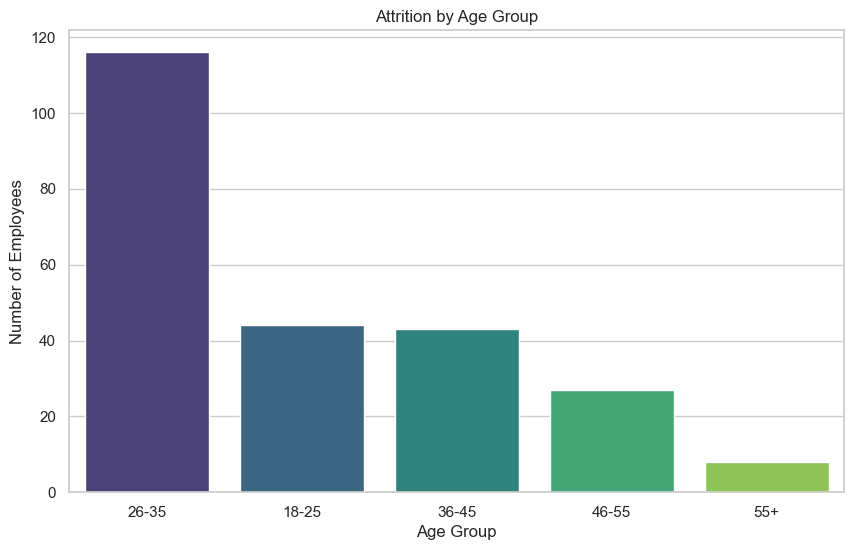

In [46]:
sns.set(style="whitegrid")
attrition_data = df[df['Attrition'] == 'Yes']
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=attrition_data, palette='viridis', order=attrition_data['AgeGroup'].value_counts().index)
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_4264\1951211335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobRole', data=attrition_data, palette='viridis', order=attrition_data['JobRole'].value_counts().index)


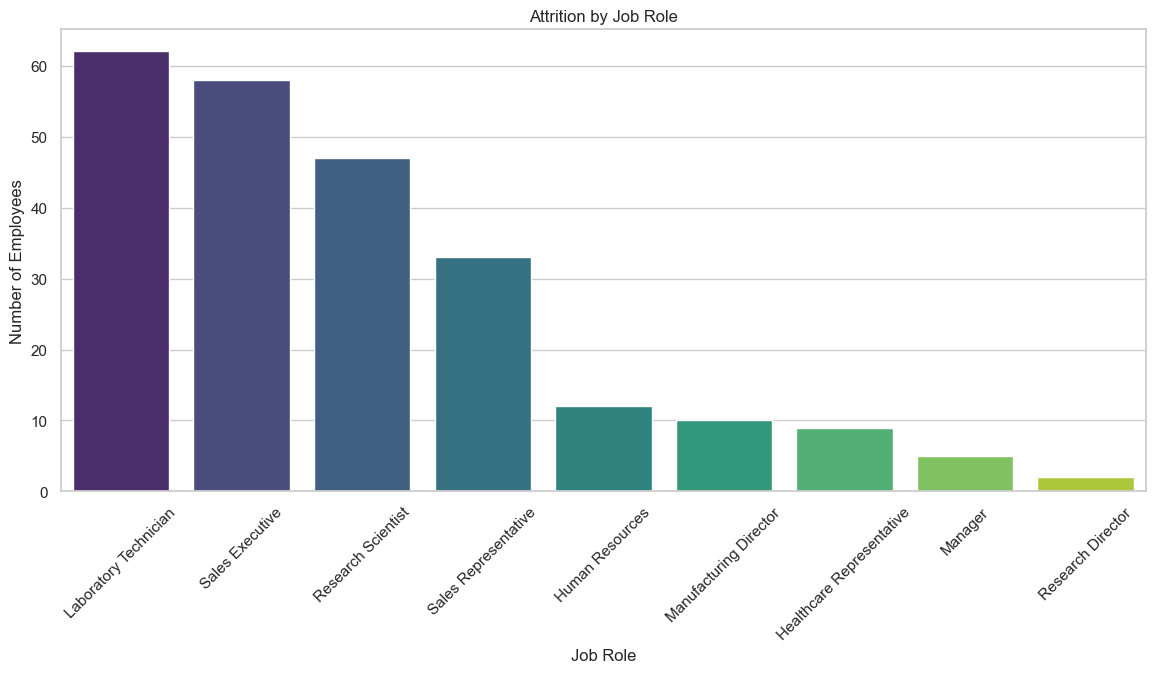

In [47]:
plt.figure(figsize=(14, 6))
sns.countplot(x='JobRole', data=attrition_data, palette='viridis', order=attrition_data['JobRole'].value_counts().index)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

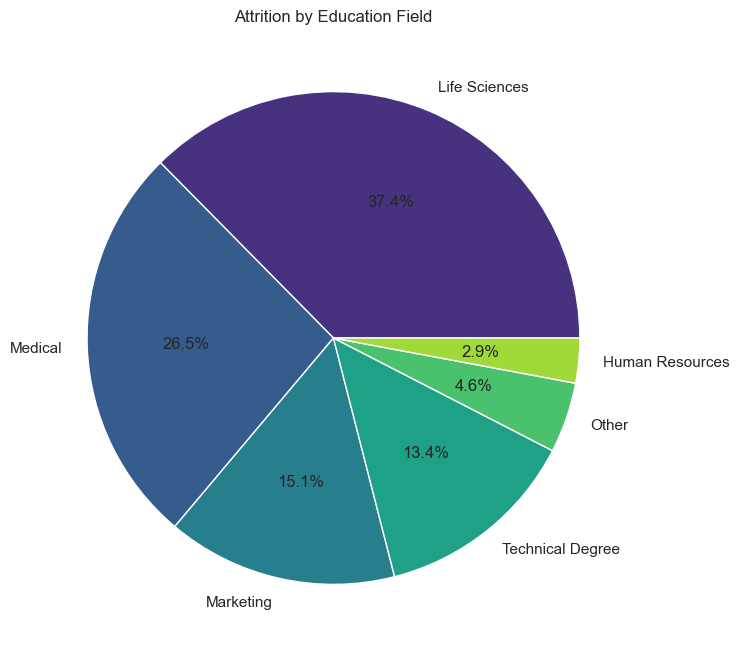

In [48]:
education_field_counts = attrition_data['EducationField'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_field_counts, labels=education_field_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(education_field_counts)))
plt.title('Attrition by Education Field')
plt.show()

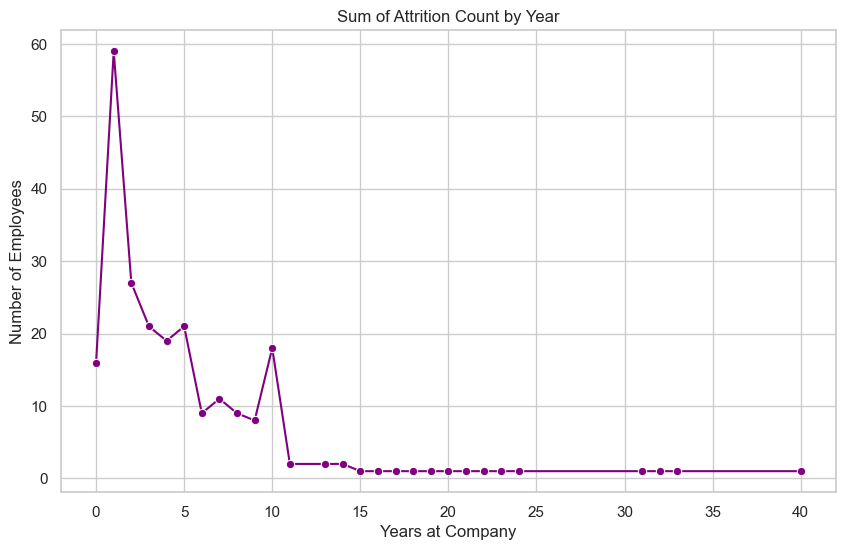

In [49]:
attrition_by_year = attrition_data.groupby('YearsAtCompany').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=attrition_by_year.index, y=attrition_by_year.values, marker='o', color='purple')
plt.title('Sum of Attrition Count by Year')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.show()


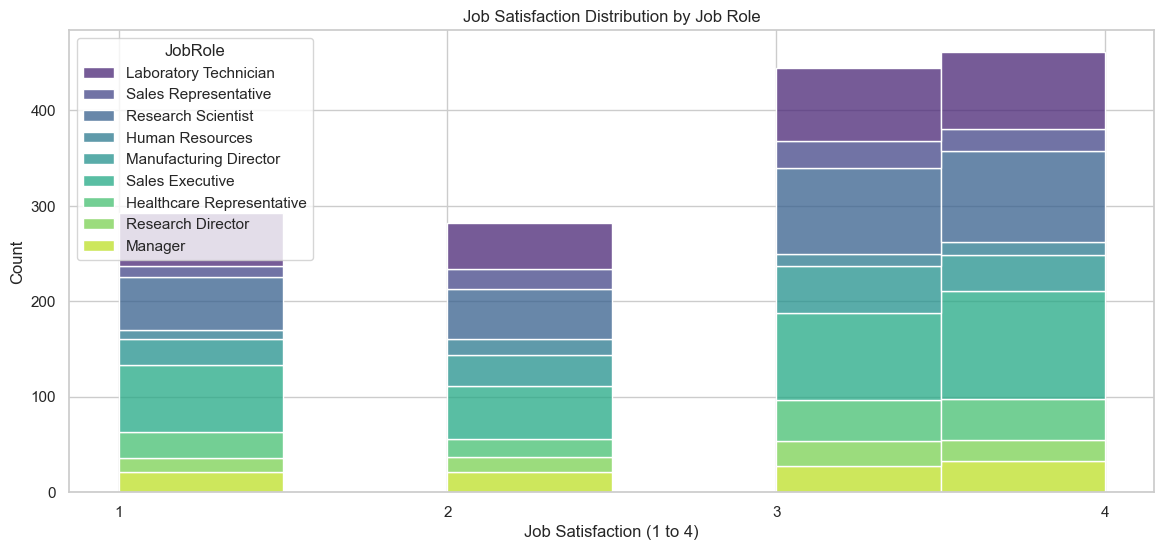

In [50]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='JobSatisfaction', hue='JobRole', multiple='stack', palette='viridis', binwidth=0.5)
plt.title('Job Satisfaction Distribution by Job Role')
plt.xlabel('Job Satisfaction (1 to 4)')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4])
plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_4264\168623495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='JobSatisfaction', data=df,palette='Spectral')


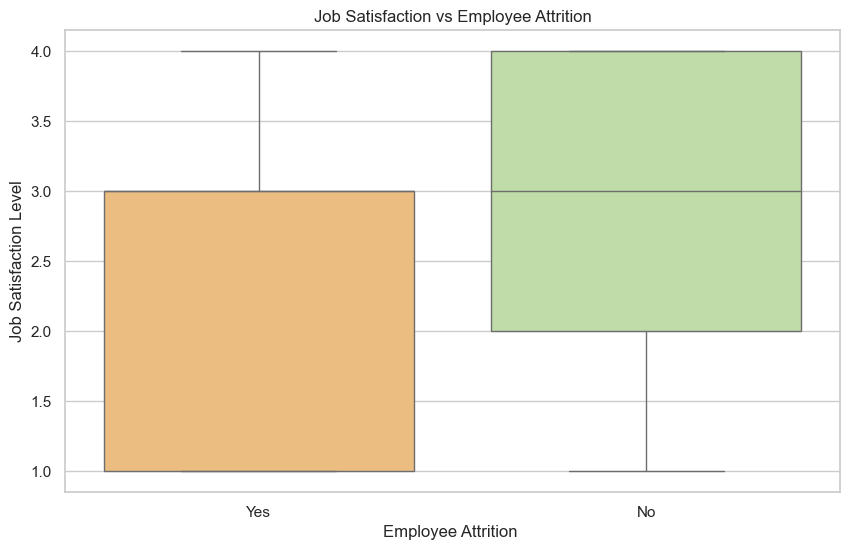

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df,palette='Spectral')
plt.title('Job Satisfaction vs Employee Attrition')
plt.xlabel('Employee Attrition ')
plt.ylabel('Job Satisfaction Level')
plt.show()

### SUMMARY

In [52]:
numeric_df = df.select_dtypes(include=[float, int])
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum(),
    'Descriptive Statistics': numeric_df.describe(),
    'Correlation Matrix': numeric_df.corr(),
}


for key, value in summary.items():
    print(f"{key}:\n{value}\n")

Dataset Shape:
(1480, 38)

Missing Values:
EmpID                          0
Age                            0
AgeGroup                       0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
SalarySlab                     0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
